### Importando as bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline
plotsize = (13, 5)
sns.set_style('darkgrid')

## Explorando o DataFrame

### Dados adquiridos no site da EIA - U.S. Energy Information Administration 
[Europe Brent Spot Price FOB](https://www.eia.gov/dnav/pet/hist/rbrteD.htm)

In [2]:
# importando o dataframe
dados = pd.read_excel("data/RBRTEd.xls", sheet_name="Data 1", skiprows=2)

In [3]:
dados.head()

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [4]:
dados.shape

(9375, 2)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9375 entries, 0 to 9374
Data columns (total 2 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Date                                              9375 non-null   datetime64[ns]
 1   Europe Brent Spot Price FOB (Dollars per Barrel)  9375 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 146.6 KB


In [6]:
dados.isna().sum() #não há dados nulos na base

Date                                                0
Europe Brent Spot Price FOB (Dollars per Barrel)    0
dtype: int64

In [7]:
dados = dados.rename(columns={'Date': 'date',
                        'Europe Brent Spot Price FOB (Dollars per Barrel)': 'dollars_per_barrel'})
dados.head()

,date,dollars_per_barrel
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


### Ajustando o Datetime

In [8]:
dados.set_index('date', inplace=True)

In [9]:
dados.index.min()

Timestamp('1987-05-20 00:00:00')

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9375 entries, 1987-05-20 to 2024-04-29
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dollars_per_barrel  9375 non-null   float64
dtypes: float64(1)
memory usage: 146.5 KB


In [11]:
dados.index

DatetimeIndex(['1987-05-20', '1987-05-21', '1987-05-22', '1987-05-25',
               '1987-05-26', '1987-05-27', '1987-05-28', '1987-05-29',
               '1987-06-01', '1987-06-02',
               ...
               '2024-04-16', '2024-04-17', '2024-04-18', '2024-04-19',
               '2024-04-22', '2024-04-23', '2024-04-24', '2024-04-25',
               '2024-04-26', '2024-04-29'],
              dtype='datetime64[ns]', name='date', length=9375, freq=None)

**O índice não tem uma frequência definida** - freq=None

Isso acontece porque o dataset só tem registros de segunda a sexta, o ideal seria ter todos os dias dessa série no dataset para que a frequência seja de 7

In [12]:
data_range = dados.index.max() - dados.index.min()

print(f'Quantidade de dias no dataset: {len(dados.index.unique())}')
print(f'Total de dias da primeira entrada até agora: {data_range.days}')
print(f'O barril só é comercializado de segunda a sexta, portanto\
 temos {data_range.days - len(dados.index.unique())} dias sem registros durante toda a série.')

Quantidade de dias no dataset: 9375
Total de dias da primeira entrada até agora: 13494
O barril só é comercializado de segunda a sexta, portanto temos 4119 dias sem registros durante toda a série.


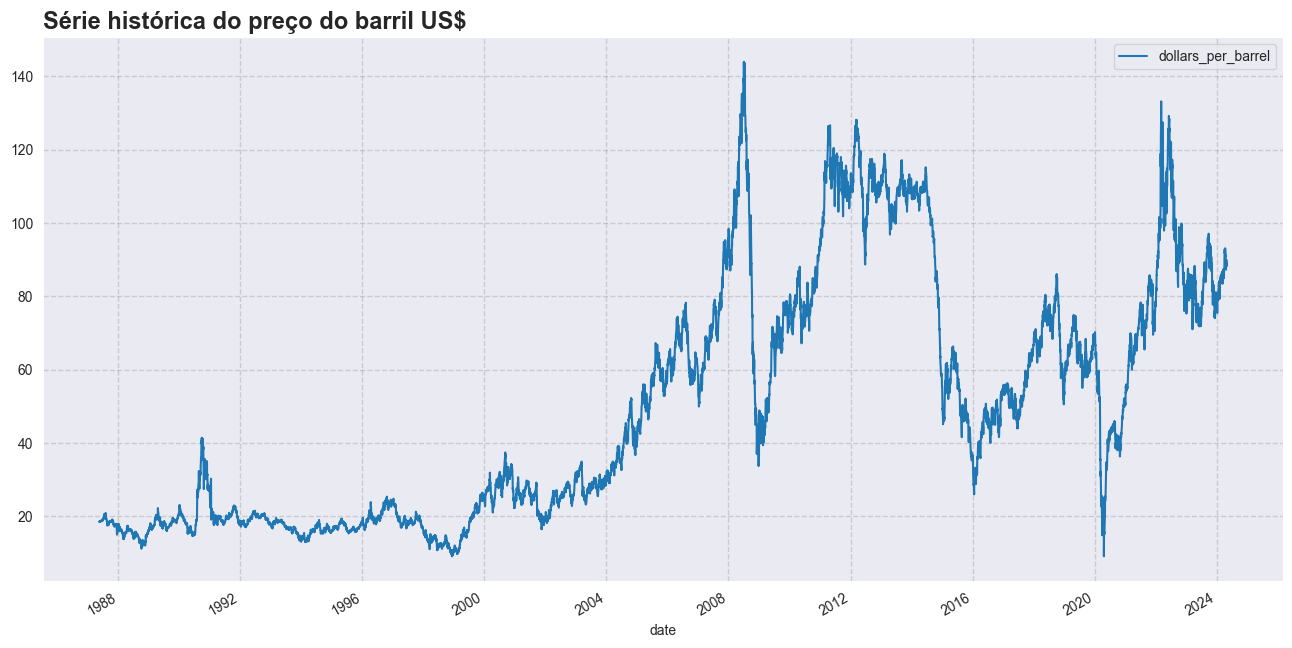

In [13]:
dados.plot(figsize=(16,8))
plt.grid(color = 'gray', linestyle= '--', linewidth = 1, alpha = 0.3)
plt.title('Série histórica do preço do barril US$', loc='left', fontsize=17, weight='bold')
plt.show()

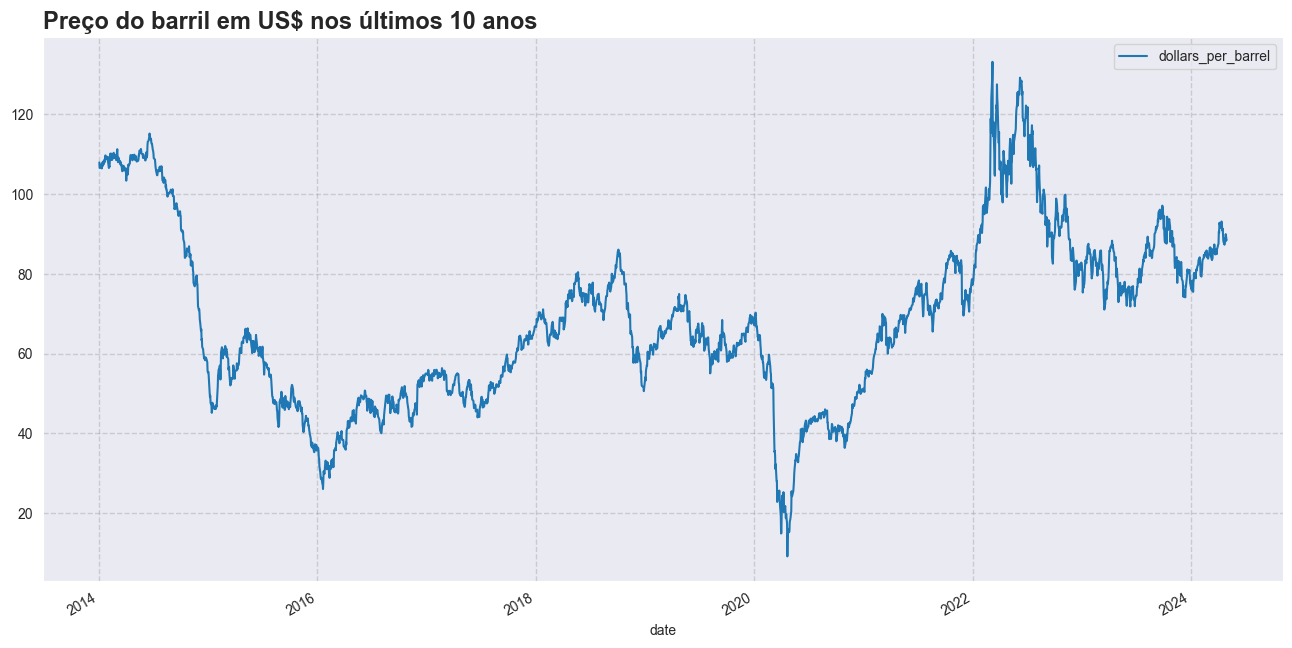

In [14]:
ultimos_10 = dados[dados.index.year.isin([2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024])]

ultimos_10.plot(figsize=(16,8))
plt.title('Preço do barril em US$ nos últimos 10 anos', loc='left', fontsize=17, weight='bold')
plt.grid(color = 'gray', linestyle= '--', linewidth = 1, alpha = 0.3)
plt.show()

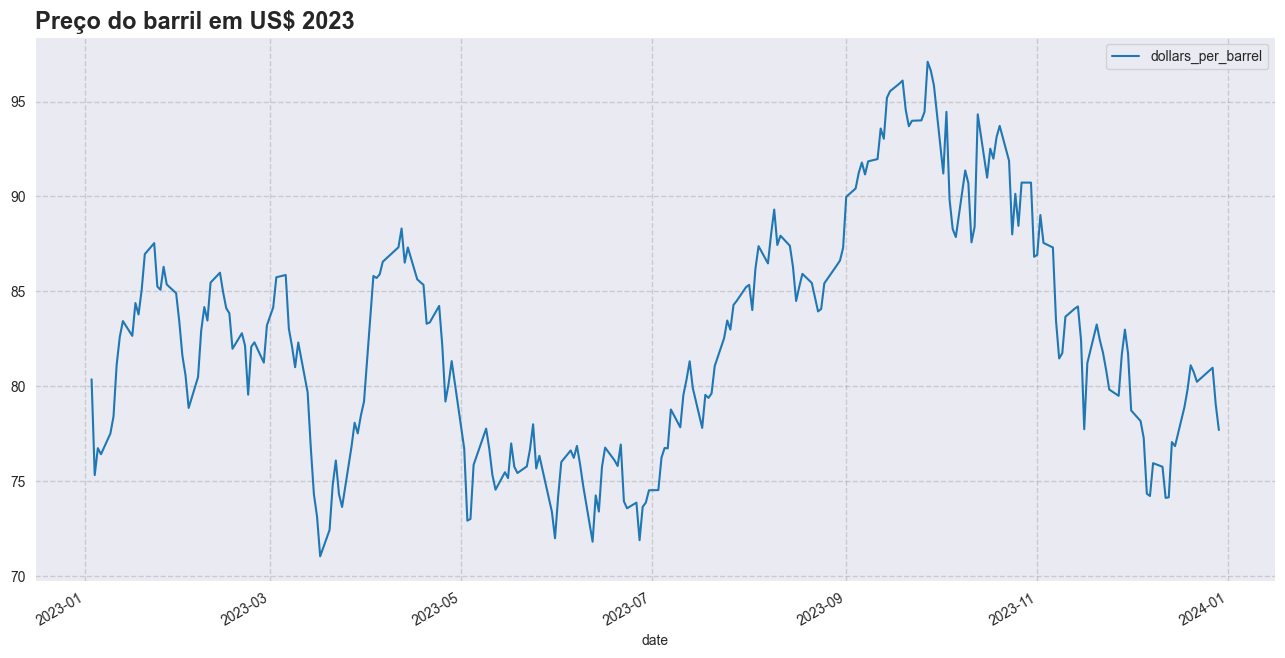

In [15]:
dados_23 = dados[dados.index.year.isin([2023])]

dados_23.plot(figsize=(16,8))
plt.title('Preço do barril em US$ 2023', loc='left', fontsize=17, weight='bold')
plt.grid(color = 'gray', linestyle= '--', linewidth = 1, alpha = 0.3)
plt.show()

## Diff

In [17]:
# criando uma cópia do df
df = dados.copy()

In [18]:
df['aumento'] = df['dollars_per_barrel'].diff()
df.head(10)

,dollars_per_barrel,aumento
date,,
1987-05-20,18.63,NaN
1987-05-21,18.45,-0.18
1987-05-22,18.55,0.10
1987-05-25,18.60,0.05
1987-05-26,18.63,0.03
1987-05-27,18.60,-0.03
1987-05-28,18.60,0.00
1987-05-29,18.58,-0.02
1987-06-01,18.65,0.07


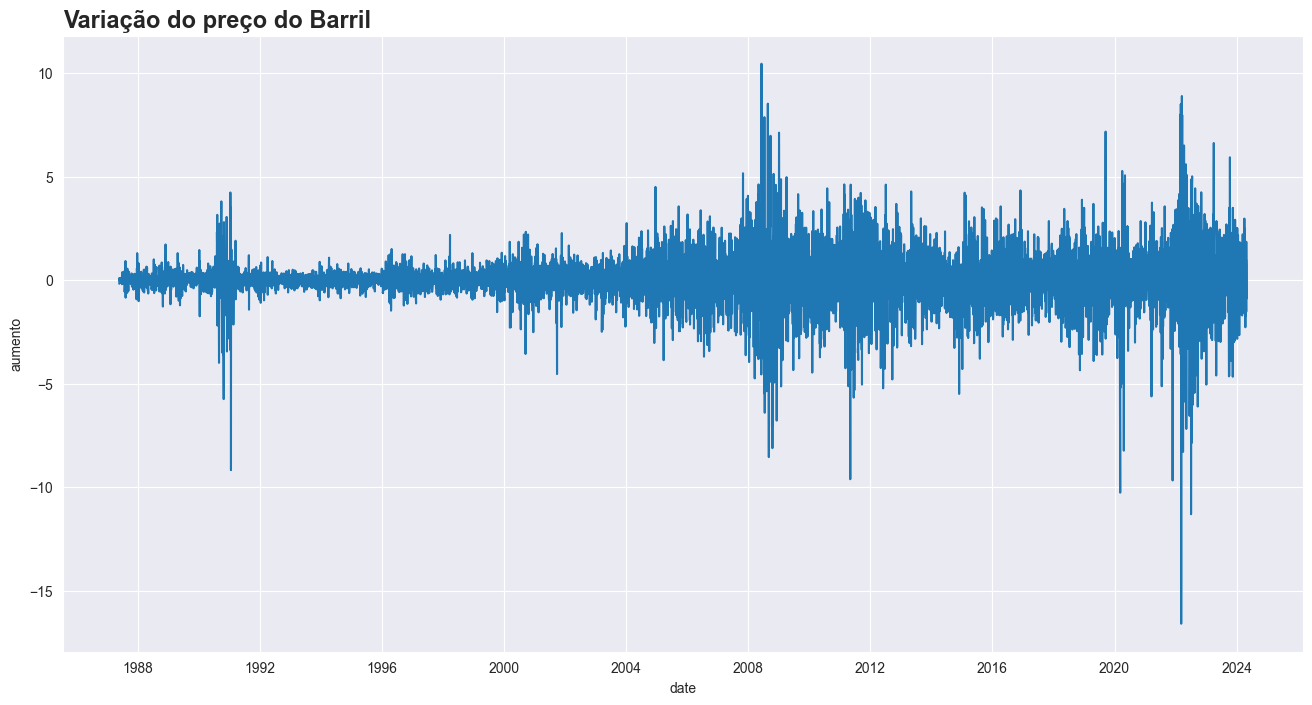

In [19]:
ax = sns.lineplot(x='date', y='aumento', data=df)
ax.figure.set_size_inches(16,8)
plt.title('Variação do preço do Barril', loc='left', fontsize=17, weight='bold')
ax=ax

## Média Movel e Janelas

In [20]:
tam_janela = 5 #nossa série tem períodos de 5 dias por semana

janela = dados.rolling(tam_janela).mean()
janela.head(10)

,dollars_per_barrel
date,
1987-05-20,NaN
1987-05-21,NaN
1987-05-22,NaN
1987-05-25,NaN
1987-05-26,18.57
1987-05-27,18.57
1987-05-28,18.60
1987-05-29,18.60
1987-06-01,18.61


In [21]:
janela = dados.rolling(tam_janela)
print(janela.mean().dropna().head(5))

            dollars_per_barrel
date                          
1987-05-26               18.57
1987-05-27               18.57
1987-05-28               18.60
1987-05-29               18.60
1987-06-01               18.61


Text(0.0, 1.0, 'Média Móvel')

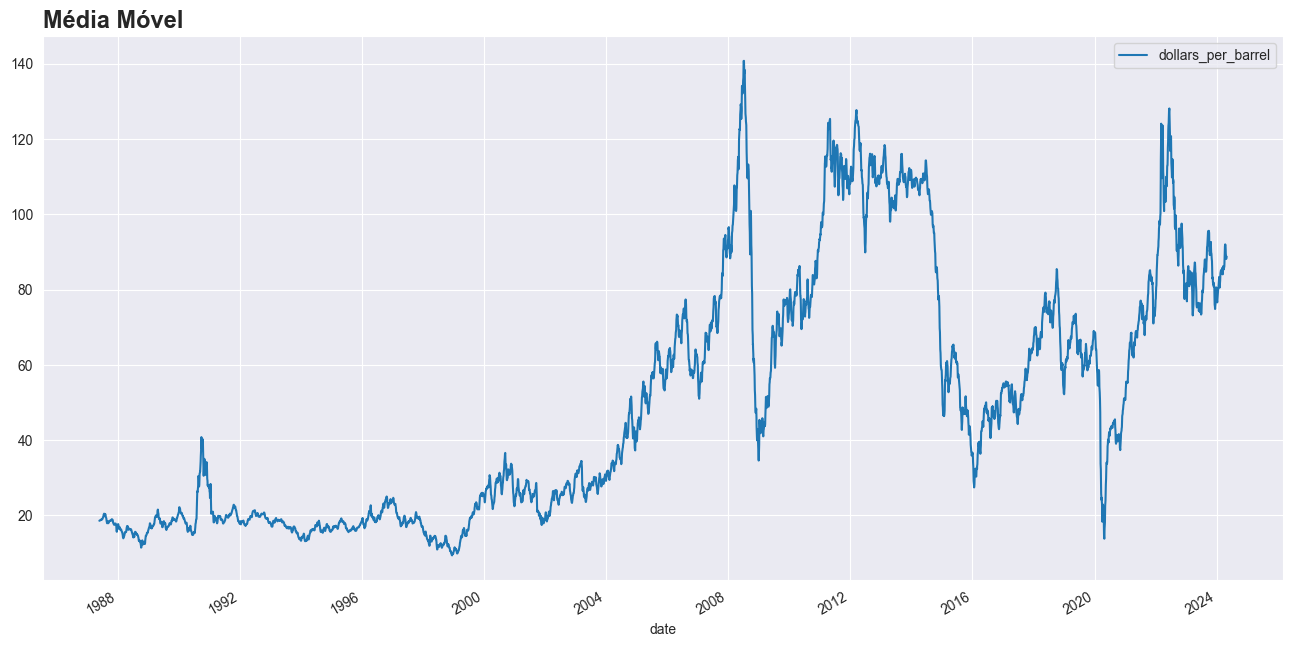

In [22]:
janela.mean().dropna().plot(figsize=(16,8))
plt.title('Média Móvel', loc='left', fontsize=17, weight='bold')

Text(0.0, 1.0, 'Desvio Padrão')

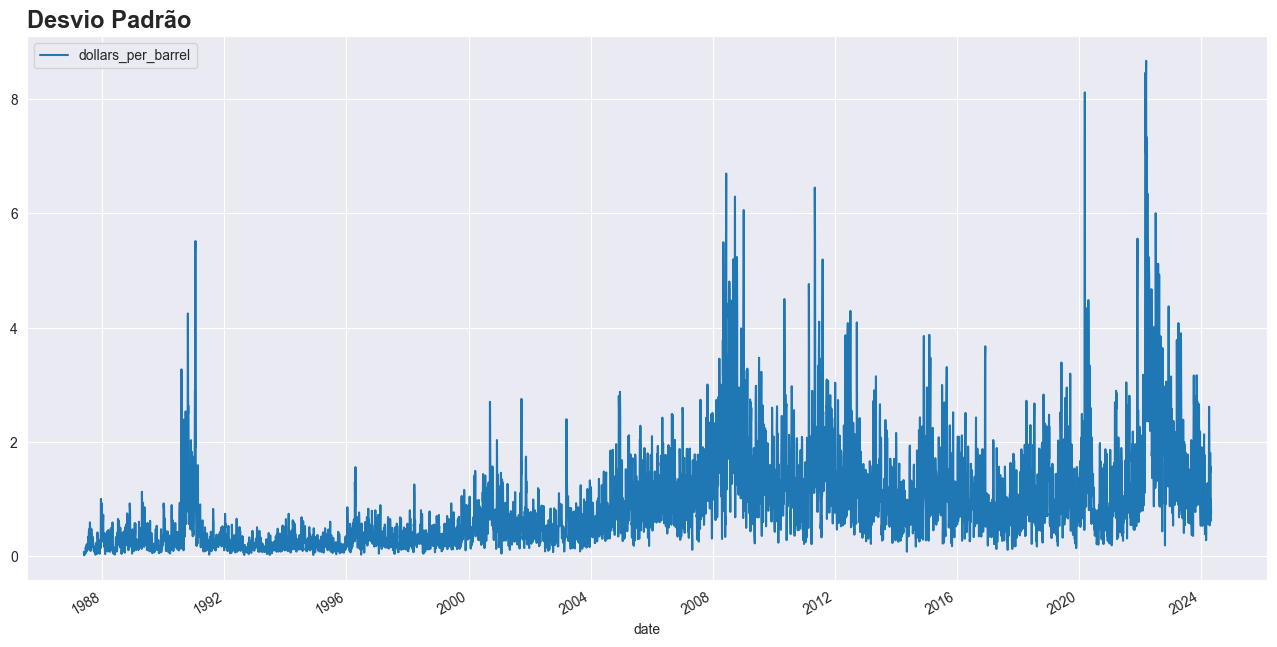

In [23]:
janela.std().dropna().plot(figsize=(16,8))
plt.title('Desvio Padrão', loc='left', fontsize=17, weight='bold')

## Upsampling

In [25]:
preco_semanal = dados.resample('W').sum()
preco_semanal.head()

,dollars_per_barrel
date,
1987-05-24,55.63
1987-05-31,93.01
1987-06-07,93.51
1987-06-14,93.77
1987-06-21,76.03


In [26]:
preco_mensal = dados.resample('M').sum()
preco_mensal.head()

,dollars_per_barrel
date,
1987-05-31,148.64
1987-06-30,396.07
1987-07-31,456.70
1987-08-31,398.57
1987-09-30,402.89


In [27]:
preco_trimestral = dados.resample('Q').sum()
preco_trimestral.head()

,dollars_per_barrel
date,
1987-06-30,544.71
1987-09-30,"1,258.16"
1987-12-31,"1,161.26"
1988-03-31,970.63
1988-06-30,"1,016.18"


In [28]:
preco_anual = dados.resample('Y').sum()
preco_anual.head()

,dollars_per_barrel
date,
1987-12-31,"2,964.13"
1988-12-31,"3,800.88"
1989-12-31,"4,629.97"
1990-12-31,"6,082.93"
1991-12-31,"5,150.57"


<Axes: title={'center': 'Cumulativo do preço semanal'}, xlabel='date'>

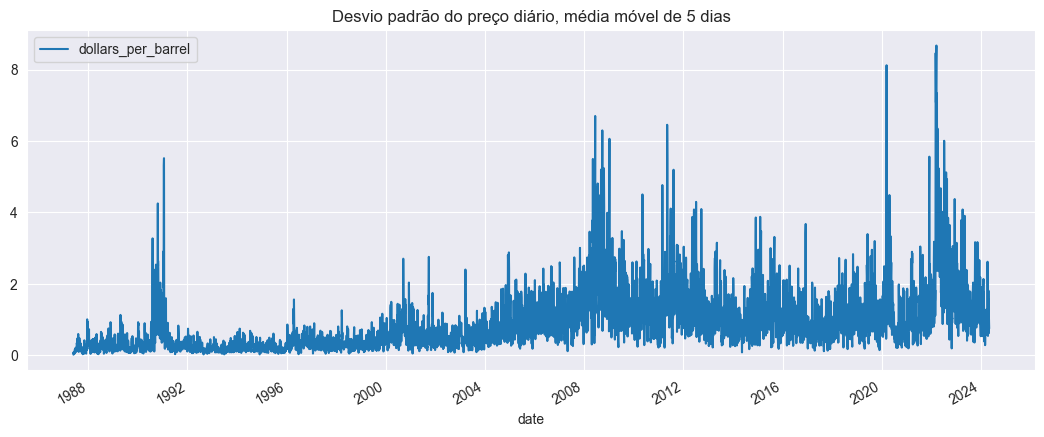

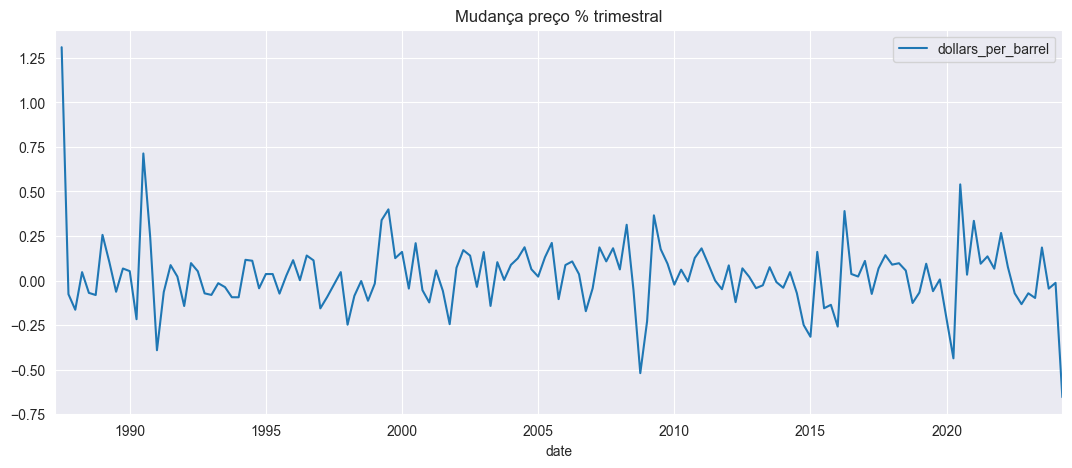

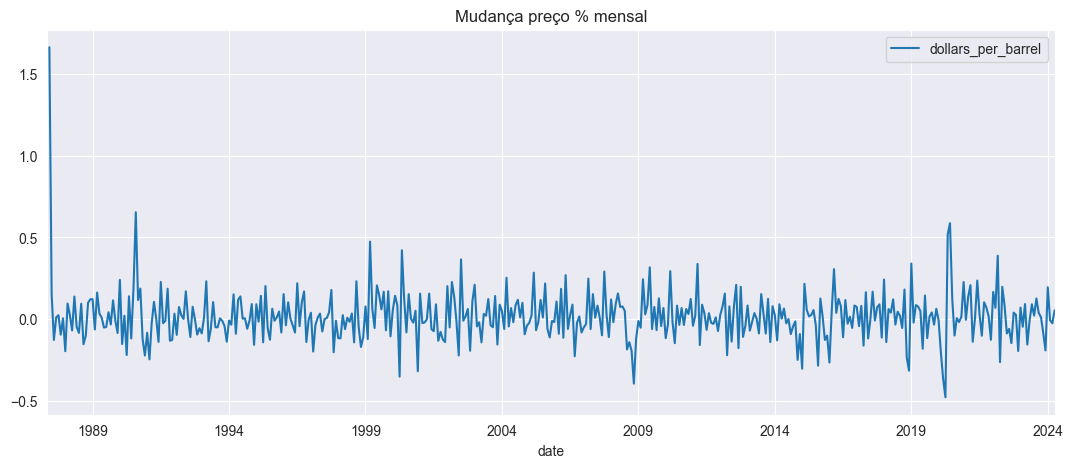

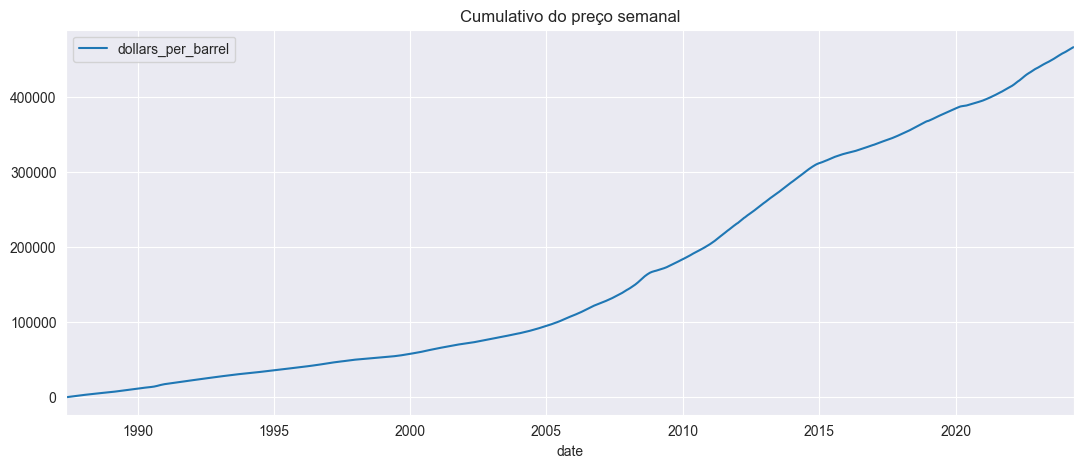

In [29]:
janela.std().plot(figsize=plotsize, title='Desvio padrão do preço diário, média móvel de 5 dias')
preco_trimestral.pct_change().plot(figsize=plotsize, title='Mudança preço % trimestral')
preco_mensal.pct_change().plot(figsize=plotsize, title='Mudança preço % mensal')
preco_semanal.cumsum().plot(figsize=plotsize, title='Cumulativo do preço semanal')

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

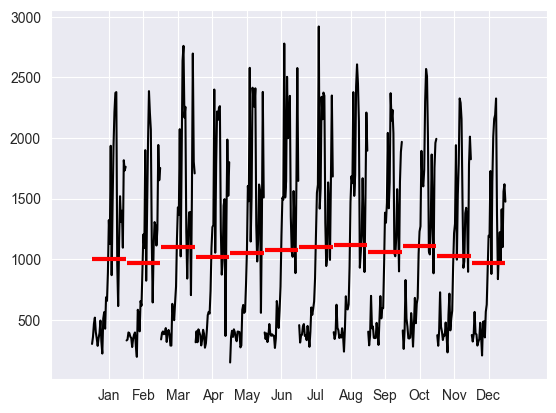

In [33]:
plot_mensal = month_plot(preco_mensal)


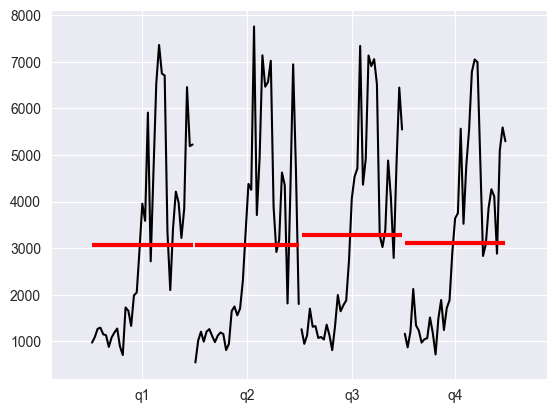

In [36]:
plot_trimestral = quarter_plot(preco_trimestral)